In [1]:
import os
import pandas as pd
import numpy as np


In [2]:
# URLs for the CSV files
# url_csv_A = "https://raw.githubusercontent.com/radiukpavlo/transition-matrix-ml/main/mnist/mnist_matrix_A.csv"
# url_csv_B = "https://raw.githubusercontent.com/radiukpavlo/transition-matrix-ml/main/mnist/mnist_matrix_B.csv"

path_csv = '../mnist/'
path_figures = '.\projects_temp-figs'

# Read the CSV files into pandas dataframes
df_matrix_A_train = pd.read_csv(f"{path_csv}/mnist_matrix_A_train.csv")
df_matrix_B_train = pd.read_csv(f"{path_csv}/mnist_matrix_B_train.csv")

df_matrix_A_test = pd.read_csv(f"{path_csv}/mnist_matrix_A_test.csv")
df_matrix_B_test = pd.read_csv(f"{path_csv}/mnist_matrix_B_test.csv")

In [3]:
# df_matrix_A_train

In [4]:
# df_matrix_B_train

## 1. Data Preparation

In [5]:
matrix_A_train = df_matrix_A_train.drop(df_matrix_A_train.columns[0], axis=1)
matrix_A_test = df_matrix_A_test.drop(df_matrix_A_test.columns[0], axis=1)

In [6]:
# Extract the first column for unique IDs
matrix_A_unique_id_train = matrix_A_train.iloc[:, 0].to_frame()
matrix_A_unique_id_test = matrix_A_test.iloc[:, 0].to_frame()

# Extract the remaining columns for matrix A
matrix_A_final_train = matrix_A_train.iloc[:, 1:]
matrix_A_final_test = matrix_A_test.iloc[:, 1:]

# Extract the first column for unique IDs
matrix_B_unique_id_train = df_matrix_B_train.iloc[:, 0].to_frame()
matrix_B_unique_id_test = df_matrix_B_test.iloc[:, 0].to_frame()

# Extract the second column for labels
matrix_B_labels_train = df_matrix_B_train.iloc[:, 1].to_frame()
matrix_B_labels_test = df_matrix_B_test.iloc[:, 1].to_frame()

# Extract the remaining columns for matrix_B_final
matrix_B_final_train = df_matrix_B_train.iloc[:, 2:]
matrix_B_final_test = df_matrix_B_test.iloc[:, 2:]

In [7]:
# matrix_A_final_train

In [8]:
# matrix_B_final_train

In [9]:
# Test matrices A

# matrix_A_final_train = [[3, -2, -3, 1.5, 0.6],
#                   [-1, -3, 1.5, 0.6, 1],
#                   [1, -1, 0.844444444, -0.444444444, -3]]

# matrix_A_final_train = [[2.80, -1.80, -2.80, 1.30, 0.40],
#                   [3.00, -2.00, -3.00, 1.50, 0.60],
#                   [3.20, -2.20, -3.20, 1.70, 0.80],
#                   [-1.60, -2.50, 1.50, 0.20, 0.60],
#                   [-1.00, -3.00, 1.50, 0.60, 1.00],
#                   [-0.50, -3.50, 1.90, 1.00, 1.40],
#                   [1.20, -1.20, 0.70, -0.30, -2.80],
#                   [1.00, -1.00, 0.84, -0.44, -3.00],
#                   [0.80, -0.80, 0.90, -0.50, -3.20]]

# matrix_A_final_train = [[-1.827506713, -2.57210291],
#                   [-1.805637206, -2.789008261],
#                   [-1.812439839, -2.99995456],
#                   [-2.035782748, -2.999989808],
#                   [-2.225907357, -2.999830184],
#                   [2.151465808, 2.349428929],
#                   [2.146415535, 1.848879366],
#                   [2.335563856, 1.572769993],
#                   [2.512780867, 1.350090422],
#                   [2.808853361, 1.168351448],
#                   [-2.397040617, 2.674381769],
#                   [-2.415455455, 2.889854745],
#                   [-2.508854802, 2.999784436],
#                   [-2.621571267, 2.999927152],
#                   [-2.71963759, 2.998711285]]


In [10]:
# Test matrices B
# matrix_B_final_train = [[-1.843907868, 1.99818664, -1.912855282, -1.97511053],
#                   [1.992023578, -1.923804827, 0.706593926, -1.543784398],
#                   [1.107744254, 1.615475549, 1.723582196, 1.807614602]]

# matrix_B_final_train = [[-1.979394104, 1.959307524, -1.381119943, -1.729640979],
#                   [-1.843907868, 1.99818664, -1.912855282, -1.97511053],
#                   [-1.999365095, 1.998896097, -1.999605076, -1.998916765],
#                   [1.997775859, -1.844000202, 1.660111333, -1.373532039],
#                   [1.992023578, -1.923804827, 0.706593926, -1.543784398],
#                   [1.997854305, -1.999410881, -0.243400633, -1.827587263],
#                   [0.851626415, 1.574201387, 1.581026838, 1.573934081],
#                   [1.107744254, 1.615475549, 1.723582196, 1.807614602],
#                   [1.290406093, 1.695289797, 1.953503509, 1.946250271]]

# matrix_B_final_train = [[2.8, -1.8, -2.8, 1.3, 0.4],
#                   [2.9, -1.9, -2.9, 1.4, 0.5],
#                   [3, -2, -3, 1.5, 0.6],
#                   [3.1, -2.1, -3.1, 1.6, 0.7],
#                   [3.2, -2.2, -3.2, 1.7, 0.8],
#                   [-1.6, -2.5, 1.5, 0.2, 0.6],
#                   [-1.3, -2.7, 1.3, 0.4, 0.8],
#                   [-1, -3, 1.5, 0.6, 1],
#                   [-0.7, -3.2, 1.7, 0.8, 1.2],
#                   [-0.5, -3.5, 1.9, 1, 1.4],
#                   [1.2, -1.2, 0.7, -0.3, -2.8],
#                   [1.1, -1.1, 0.8, -0.4, -2.9],
#                   [1, -1, 0.844444444, -0.444444444, -3],
#                   [0.9, -0.9, 0.85, -0.45, -3.1],
#                   [0.8, -0.8, 0.9, -0.5, -3.2]]


In [11]:
df_matrix_A_final_train = pd.DataFrame(matrix_A_final_train)
df_matrix_A_final_test = pd.DataFrame(matrix_A_final_test)

In [12]:
# df_matrix_A_final_train

In [13]:
# df_matrix_A_final_test

## 2. Calculate Determinant

In [14]:
# 1. Calculate the transpose of matrix_A_final
matrix_A_final_train_transpose = df_matrix_A_final_train.transpose()

# 2. Calculate the multiplication of matrix_A_final and matrix_A_final_transpose
matrix_A_final_train_mmult = np.dot(df_matrix_A_final_train.values, matrix_A_final_train_transpose.values)

# 3. Calculate the determinant of matrix_A_final_mmult
matrix_A_final_train_determinant = np.linalg.det(matrix_A_final_train_mmult)

print(matrix_A_final_train_determinant)


-0.0


## 3. Calculate Transition Matrix

### 3.1. Singular Value Decomposition (SVD)

In [15]:
# Receive values from the matrix A DataFrame 
matrix_A_final_train_values = df_matrix_A_final_train.values

# Calculate SVD
U, s, Vt = np.linalg.svd(matrix_A_final_train_values)

# Construct the full diagonal matrix
S = np.zeros(matrix_A_final_train_values.shape)
for i in range(min(matrix_A_final_train_values.shape)):
    S[i, i] = s[i]

print("U:\n", U)
print("\nS:\n", S)
print("\nVt:\n", Vt)


U:
 [[-1.54780666e-02 -1.41638927e-02  1.05845736e-02 ...  1.51258614e-04
  -2.17958598e-03 -4.62022689e-03]
 [-1.15935035e-02 -1.66897114e-02 -1.30926663e-02 ...  2.26793933e-03
   5.59471096e-04 -5.30190927e-04]
 [-9.33083688e-03 -3.83937507e-03  9.78539366e-03 ...  3.04485946e-05
   1.26249841e-03  1.96165521e-03]
 ...
 [-9.55440523e-03  1.18578646e-02 -1.75987392e-03 ...  9.75921408e-01
   5.41127891e-04 -1.89074361e-03]
 [-5.94360502e-03  8.26395932e-03  1.10433637e-02 ...  7.41224033e-04
   9.89223751e-01  8.71814853e-04]
 [-8.44349374e-03 -1.11604347e-02 -6.24253571e-03 ... -1.12488788e-03
   8.54547750e-04  9.73988783e-01]]

S:
 [[974.27194538   0.           0.         ...   0.           0.
    0.        ]
 [  0.         457.404426     0.         ...   0.           0.
    0.        ]
 [  0.           0.         388.3576877  ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.  

In [16]:
U.shape

(10000, 10000)

### 3.2. Create the reconstructed matrix of SVD

In [17]:
# Recompute the original matrix using U, S, and Vt
reconstructed_matrix = U.dot(S.dot(Vt))

# Convert the reconstructed matrix to a pandas DataFrame, if desired
reconstructed_df = pd.DataFrame(reconstructed_matrix)


In [18]:
reconstructed_df

,0,1,2,3,4,5,6,7,8,9,...,480,481,482,483,484,485,486,487,488,489
0,2.489328e-16,7.351460e-15,9.032695e-01,1.718601e+00,1.755106e-15,1.434616e-15,-1.084202e-16,-1.257458e-15,7.352450e-01,8.973203e-01,...,2.540933e+00,5.384482e+00,2.273355e-15,-1.647987e-17,-2.966377e-16,4.436970e-03,-1.312622e-14,5.115880e-01,-5.984796e-17,-4.857226e-17
1,-1.023487e-16,4.073131e-15,-1.123233e-14,6.100464e-01,1.566417e+00,5.958696e-01,1.935951e-15,-4.266552e-15,-3.641185e-15,4.525226e-01,...,2.364520e+00,4.119849e+00,-2.171874e-15,1.344411e-17,3.070461e-16,-5.803734e-15,-1.674182e-14,7.696789e-01,4.579670e-16,-1.387779e-16
2,4.059253e-16,-6.702538e-16,7.210595e-15,1.806610e+00,1.548320e+00,-1.395585e-15,4.440892e-16,2.141082e-15,-4.528496e-15,1.437696e+00,...,-2.723624e-14,2.092778e-01,-1.993631e-15,1.058181e-16,3.932423e-01,-4.591379e-15,-1.228401e-14,-1.426723e-14,1.120371e-02,1.538217e-03
3,-1.023487e-16,2.867498e-15,4.803124e-15,7.758981e-01,7.885861e-01,-1.641048e-15,-2.866631e-16,-1.509209e-16,-3.299010e-15,-5.455055e-15,...,2.141561e+00,1.296514e+00,-1.092876e-16,1.860544e-01,2.641162e-01,-4.367492e-15,1.997272e-01,-8.681640e-15,2.237793e-16,1.538217e-03
4,-2.142383e-16,6.895526e-16,6.667410e-15,1.495034e-01,9.108762e-15,-8.514890e-15,-1.105019e-15,-1.503138e-15,1.928823e-15,8.895337e-16,...,-6.120050e-15,-2.757668e-16,4.953720e-16,1.387779e-17,-1.849649e-16,1.805512e-01,1.260595e+00,-4.831212e-15,2.511012e-16,1.538217e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.387779e-16,1.099121e-14,7.719519e-15,8.795048e-16,2.527384e-15,1.600282e-15,3.885781e-16,3.035897e-01,1.756173e+00,2.096429e+00,...,4.760990e+00,4.690363e+00,1.462372e-15,-1.409463e-16,-1.214306e-17,-4.311222e-15,1.460578e-01,2.425460e+00,3.720982e-16,1.734723e-17
9996,-8.205242e-16,-2.597748e-15,6.077604e-15,1.152444e+00,1.639893e+00,-1.069457e-15,-4.579670e-16,-7.806256e-17,8.383572e-02,8.668661e-01,...,1.478740e+00,2.062369e+00,2.699230e-15,2.111786e-01,6.194506e-01,-4.230557e-16,-9.477879e-15,2.150875e+00,2.342818e-01,9.367507e-17
9997,-4.649059e-16,8.822804e-15,1.360836e-15,6.775613e-15,7.046230e-16,-1.909497e-15,-1.731254e-15,2.862294e-17,2.327905e-01,6.617715e-01,...,2.610151e+00,1.420608e-14,1.514630e-15,4.119968e-17,3.417405e-16,2.734728e+00,3.268774e+00,-6.872866e-15,-5.516421e-16,1.538217e-03
9998,2.944693e-16,-5.169476e-16,8.522805e-15,2.830935e-01,2.458320e-15,1.838807e-15,-5.551115e-16,-5.223686e-16,1.209644e-15,2.181876e-15,...,5.434279e-15,5.483027e-15,4.162794e-16,3.209238e-17,1.383442e-16,1.921019e+00,3.280038e-01,-2.818871e-15,-6.683022e-16,1.538217e-03


### 3.3. Calculate the generalized inverse of Matrix A

In [19]:
# Calculate the generalized (Moore-Penrose) inverse
matrix_A_final_train_pinv = np.linalg.pinv(df_matrix_A_final_train.values)

# Convert to a pandas DataFrame, if desired
matrix_A_final_train_pinv_df = pd.DataFrame(matrix_A_final_train_pinv)


In [20]:
# matrix_A_final_train_pinv_df

### 3.4. Calculate transition matrix T

In [21]:
transition_matrix_T = matrix_A_final_train_pinv_df.dot(matrix_B_final_train)

In [22]:
transition_matrix_T

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.003493,0.000710,0.000224,-0.000808,-0.001841,-0.000319,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000616,-0.000944,0.000200,0.000273,0.000423,0.000046,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000129,0.000094,0.000045,-0.000054,-0.000203,-0.000046,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000091,-0.000014,-0.000006,0.000052,0.000057,0.000001,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000135,-0.000015,-0.000026,-0.000154,-0.000301,-0.000046,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000887,-0.000524,-0.000017,-0.000039,-0.000300,-0.000081,0.0,0.0,0.0,0.0
486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000668,-0.000056,0.000019,0.000045,0.000029,-0.000005,0.0,0.0,0.0,0.0
487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003242,0.000940,0.000014,-0.000092,-0.000349,-0.000079,0.0,0.0,0.0,0.0
488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014402,0.015915,0.001321,0.000010,0.000081,0.000022,0.0,0.0,0.0,0.0


## 4. Fomal Model → Mental Model

### Calculate new Mental Model

In [23]:
# formal_model_test = [[2.8, -1.8, -2.8, 1.3, 0.4],
#                      [2.9, -1.9, -2.9, 1.4, 0.5],
#                      [3, -2, -3, 1.5, 0.6],
#                      [3.1, -2.1, -3.1, 1.6, 0.7],
#                      [3.2, -2.2, -3.2, 1.7, 0.8],
#                      [-1.6, -2.5, 1.5, 0.2, 0.6],
#                      [-1.3, -2.7, 1.3, 0.4, 0.8],
#                      [-1, -3, 1.5, 0.6, 1],
#                      [-0.7, -3.2, 1.7, 0.8, 1.2],
#                      [-0.5, -3.5, 1.9, 1, 1.4],
#                      [1.2, -1.2, 0.7, -0.3, -2.8],
#                      [1.1, -1.1, 0.8, -0.4, -2.9],
#                      [1, -1, 0.844444444, -0.444444444, -3],
#                      [0.9, -0.9, 0.85, -0.45, -3.1],
#                      [0.8, -0.8, 0.9, -0.5, -3.2]]
# 
# mental_model_test = [[-1.979394104, 1.959307524, -1.381119943, -1.729640979],
#                      [-1.974921385, 1.94850558, -1.726609792, -1.761213024],
#                      [-1.843907868, 1.99818664, -1.912855282, -1.97511053],
#                      [-1.998625355, 1.999671808, -1.998443276, -1.999764956],
#                      [-1.999365095, 1.998896097, -1.999605076, -1.998916765],
#                      [1.997775859, -1.844000202, 1.660111333, -1.373532039],
#                      [1.818753218, -1.909687734, 1.206631506, -1.407994628],
#                      [1.992023578, -1.923804827, 0.706593926, -1.543784398],
#                      [1.999174385, -1.997592083, 0.21221635, -1.586974171],
#                      [1.997854305, -1.999410881, -0.243400633, -1.827587263],
#                      [0.851626415, 1.574201387, 1.581026838, 1.573934081],
#                      [1.008512576, 1.570791652, 1.595657199, 1.741761976],
#                      [1.107744254, 1.615475549, 1.723582196, 1.807614602],
#                      [1.089897991, 1.611369928, 1.882537367, 1.873522151],
#                      [1.290406093, 1.695289797, 1.953503509, 1.946250271]]
# 
# df_formal_model_test = pd.DataFrame(formal_model_test)
# df_mental_model_test = pd.DataFrame(mental_model_test)

In [24]:
matrix_B_calculated_train = df_matrix_A_final_train.values.dot(transition_matrix_T.values)
matrix_B_calculated_test = df_matrix_A_final_test.values.dot(transition_matrix_T.values)

# matrix_B_calculated_train = df_formal_model_test.values.dot(transition_matrix_T.values)

In [25]:
matrix_B_calculated_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
matrix_B_final_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
matrix_B_calculated_train_df = pd.DataFrame(matrix_B_calculated_train)
matrix_B_calculated_test_df = pd.DataFrame(matrix_B_calculated_test)

matrix_B_calculated_train_df.to_csv('.\projects_temp-data\matrix_B_calculated_train.csv', index=False)
matrix_B_calculated_test_df.to_csv('.\projects_temp-data\matrix_B_calculated_test.csv', index=False)
matrix_B_final_train.to_csv('.\projects_temp-data\matrix_B_final_train.csv', index=False)
matrix_B_final_test.to_csv('.\projects_temp-data\matrix_B_final_test.csv', index=False)

### Calculate the Euclidean distance

In [28]:
# Calculate Euclidean distance for each row
euclidean_distances_train = np.sqrt(((matrix_B_final_train.values - matrix_B_calculated_train) ** 2).sum(axis=1))
euclidean_distances_test = np.sqrt(((matrix_B_final_test.values - matrix_B_calculated_test) ** 2).sum(axis=1))

# euclidean_distances_train = np.sqrt(((df_mental_model_test - matrix_B_calculated) ** 2).sum(axis=1))

# Sum of all the Euclidean distances
total_distance_train = euclidean_distances_train.sum()
total_distance_test = euclidean_distances_test.sum()

In [29]:
print(f"For train data, the total Euclidean distance is {total_distance_train}")
print(f"For test data, the total Euclidean distance is {total_distance_test}")

For train data, the total Euclidean distance is 34547.9559834357
For test data, the total Euclidean distance is 3626.3680550360205


## 5. Results

### 5.1. Visualizing Digits

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn-v0_8')

def plot_mnist(input_data, num_to_display, input_indices=None):
    """
    Plots the MNIST numbers from the given data which can be either a DataFrame or a numpy array.
    
    :param input_data: Either DataFrame or numpy array containing MNIST numbers flattened.
    :param num_to_display: Number of MNIST images to display.
    :param input_indices: A list of indices to pick specific images. If None, the first 'num_to_display' images are shown.
    """
    max_columns = 5  # Maximum number of images in one row

    # Check the type of data and convert accordingly
    if isinstance(input_data, pd.DataFrame):
        data_array = input_data.to_numpy()
    elif isinstance(input_data, np.ndarray):
        data_array = input_data
    else:
        raise TypeError("Input data must be either a pandas DataFrame or a numpy array.")

    # If input_indices are provided, validate them
    if input_indices:
        if len(input_indices) != num_to_display:
            raise ValueError("Length of 'input_indices' should match 'num_to_display'")

        if any(item < 0 or item >= len(data_array) for item in input_indices):
            raise ValueError("'input_indices' contain invalid values. Ensure all are in the range [0, len(data_array)-1].")

        data_to_plot = data_array[input_indices]
    else:
        data_to_plot = data_array[:num_to_display]

    # Calculate the number of rows and columns to display
    num_rows = (num_to_display // max_columns) + int(num_to_display % max_columns > 0)
    num_cols = min(num_to_display, max_columns)  # Limit the number of columns to 10

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(2 * num_cols, 2 * num_rows))

    # If there's only 1 row, axes is a 1D array, we make it 2D for consistent indexing
    if num_rows == 1:
        axes = np.expand_dims(axes, axis=0)

    for idx, ax in enumerate(axes.ravel()):
        if idx >= len(data_to_plot):
            ax.axis("off")  # Turn off the axis if no data to display
            continue
        # Reshape the flattened image into 28x28
        img = data_to_plot[idx].reshape(28, 28)
        ax.imshow(img, cmap="gray")
        ax.axis("off")  # Turn off the axis numbers

    plt.show()

# Test
# Assuming data is loaded as numpy array or DataFrame
# Example: plot_mnist(data, 15, indices=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])


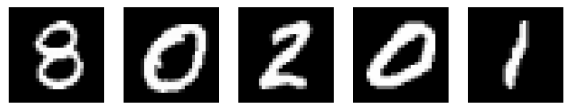

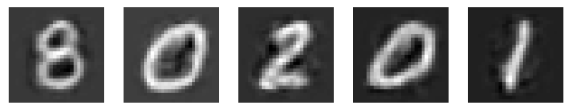

In [31]:
n_images = 5
indices = None

# Call the function with matrix_B_final dataframe or numpy array
plot_mnist(matrix_B_final_train, n_images, indices)

plot_mnist(matrix_B_calculated_train, n_images, indices)

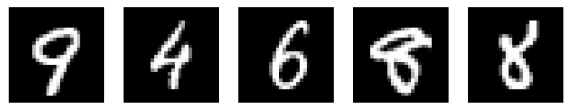

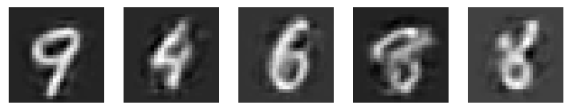

In [32]:
# Call the function with matrix_B_final dataframe or numpy array
plot_mnist(matrix_B_final_test, n_images, indices)

plot_mnist(matrix_B_calculated_test, n_images, indices)

### 5.2. Metrics

#### 5.2.1 SSIM

In [33]:
from skimage.metrics import structural_similarity as ssim

def calculate_ssim_table(df1, df2):
    # Check and convert to numpy array if necessary
    table1 = df1 if isinstance(df1, np.ndarray) else df1.to_numpy()
    table2 = df2 if isinstance(df2, np.ndarray) else df2.to_numpy()

    ssim_values = []
    for i in range(table1.shape[0]):
        image1 = table1[i].reshape(28, 28)
        image2 = table2[i].reshape(28, 28)
        ssim_values.append(ssim(image1, image2, data_range=image1.max() - image1.min()))

    # Create a DataFrame and add the average
    ssim_df = pd.DataFrame(ssim_values, columns=['SSIM'])
    ssim_average = ssim_df.mean()
    return ssim_df, ssim_average


In [34]:
my_ssim_df, my_ssim_average = calculate_ssim_table(matrix_B_final_test, matrix_B_calculated_test)

In [35]:
my_ssim_df.to_csv('.\projects_temp-data\my_ssim_df.csv', index=False)

In [61]:
def plot_ssim_histogram(ssim_data, save_path):
    """
    Plots a histogram of SSIM scores.

    Parameters:
    ssim_data (DataFrame): A pandas DataFrame containing SSIM scores in a column named 'SSIM'.
    title (str): Title for the histogram. Default is 'Distribution of SSIM Scores'.
    """
    # Define the figure name and path
    figure_name = 'my_distr_ssim.svg'
    my_save_path = os.path.join(save_path, figure_name)

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)
    
    plt.figure(figsize=(6,4))
    ax = sns.histplot(data=ssim_data['SSIM'], kde=True, 
                      bins=20, color='lightgreen', edgecolor='darkolivegreen')
    ax.lines[0].set_color('darkseagreen')
    plt.title('Distribution of SSIM Scores')
    plt.xlabel('SSIM Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(my_save_path)
    plt.gcf().set_dpi(200)
    plt.show()

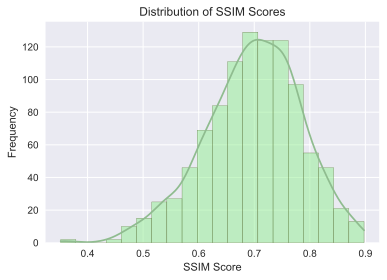

In [62]:
plot_ssim_histogram(my_ssim_df, path_figures)

#### 5.2.2. PSNR

In [38]:
from skimage.metrics import peak_signal_noise_ratio as psnr

def calculate_psnr_table(df1, df2):
    # Check and convert to numpy array if necessary
    table1 = df1 if isinstance(df1, np.ndarray) else df1.to_numpy()
    table2 = df2 if isinstance(df2, np.ndarray) else df2.to_numpy()

    psnr_values = []
    for i in range(table1.shape[0]):
        image1 = table1[i].reshape(28, 28)
        image2 = table2[i].reshape(28, 28)
        psnr_values.append(psnr(image1, image2, data_range=image1.max() - image1.min()))

    # Create a DataFrame and add the average
    psnr_df = pd.DataFrame(psnr_values, columns=['PSNR'])
    psnr_average = psnr_df.mean()
    return psnr_df, psnr_average


In [39]:
my_psnr_df, my_psnr_average = calculate_psnr_table(matrix_B_final_test, matrix_B_calculated_test)

In [40]:
my_psnr_df.to_csv('.\projects_temp-data\my_psnr_df.csv', index=False)

In [59]:
def plot_psnr_histogram(psnr_data, save_path):
    """
    Plots a histogram of PSNR scores.

    Parameters:
    psnr_data (DataFrame): A pandas DataFrame containing PSNR scores in a column named 'PSNR'.
    title (str): Title for the histogram. Default is 'Distribution of PSNR Scores'.
    """
    # Define the figure name and path
    figure_name = 'my_distr_psnr.svg'
    my_save_path = os.path.join(save_path, figure_name)

    # Ensure the save directory exists
    os.makedirs(save_path, exist_ok=True)

    plt.figure(figsize=(6,4))
    ax = sns.histplot(data=psnr_data['PSNR'], kde=True,
                      bins=20, color='skyblue', edgecolor='steelblue')
    ax.lines[0].set_color('cornflowerblue')
    plt.title('Distribution of PSNR Scores')
    plt.xlabel('PSNR Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.savefig(my_save_path)
    plt.gcf().set_dpi(200)
    plt.show()

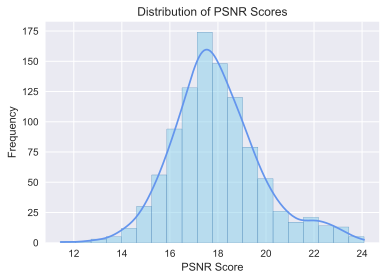

In [60]:
plot_psnr_histogram(my_psnr_df, path_figures)